## NSGA-III


The algorithm is implemented in base of <cite data-cite="nsga3-part1,nsga3-part2"></cite>. Implementation details of this algorithm can be found in <cite data-cite="nsga3-norm"></cite>. The reference lines that should be used by this algorithm must be defined before it is executed. Commonly, the Das-Dennis method (implemented in UniformReferenceDirectionFactory) is used to sample reference directions uniformly.

The survival, first, the non-dominated sorting is done as in NSGA-II. 

<div style="display: block;margin-left: auto;margin-right: auto;width: 40%;">
![nsga3_survival_1](../resources/images/nsga3_survival_1.png)
</div>

Second, from the splitting front some solutions need to be selected. NSGA-III fills up the underrepresented reference direction first. If the reference direction does not have any solution assigned to, then the solution with the smallest perpendicular distance in the normalized objective space is surviving. In case, a second solution for this reference line is added, it is assigned randomly. 


<div style="display: block;margin-left: auto;margin-right: auto;width: 40%;">
![nsga3_survival_2](../resources/images/nsga3_survival_2.png)
</div>

For this reason, when this algorithm converges each reference line seeks to find a good representative non-dominated solution.

### Example

No handles with labels found to put in legend.


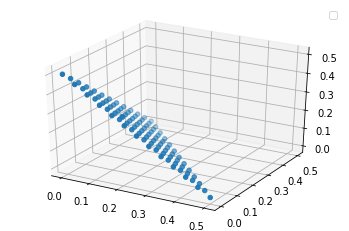

In [1]:
from pymoo.optimize import minimize
from pymoo.util import plotting
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymop.factory import get_problem

problem = get_problem("dtlz1")

# create the reference directions to be used for the optimization
ref_dirs = UniformReferenceDirectionFactory(3, n_points=91).do()

# create the pareto front for the given reference lines
pf = problem.pareto_front(ref_dirs)

res = minimize(problem,
               method='nsga3',
               method_args={
                   'pop_size': 92,
                   'ref_dirs': ref_dirs
               },
               termination=('n_gen', 600),
               pf=pf,
               seed=4,
               disp=False)

plotting.plot(res.F, show=True)


### API